<a href="https://colab.research.google.com/github/Alyssasorensen/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Homework Assignment: Introduction to Databases with SQLite



### Loading Packages

In [109]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Datasets

In [110]:
sbm = pd.read_csv('https://raw.githubusercontent.com/Alyssasorensen/sqlite_database_operations/main/datasets/113243405_StonyBrookUniversityHospital_standardcharges.csv')

In [111]:
sbm

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Load the dataset from the URL with specified encoding
url = "https://raw.githubusercontent.com/Alyssasorensen/sqlite_database_operations/main/datasets/596014973_Memorial_Hospital_Miramar_StandardCharges.csv"
memorial = pd.read_csv(url, encoding="ISO-8859-1")

# Now we can work with the 'memorial' DataFrame


In [114]:
memorial

,1,CDM GROSS CHARGE AND CASH PAY SECTION,ProcedureCode,ProcedureDescription,Lawson Number,NDC,Revenue Code,CPT Code,Unnamed: 8,Default Charge,ER Charge,Inpatient Therapy,Cash Charge
0,2,11000004,11000004,HC PRIVATE MOST COMMON,NaN,NaN,110.0,NaN,NaN,-,-,-,-
1,3,11000004,11000004,HC PRIVATE MOST COMMON MRHS,NaN,NaN,110.0,NaN,NaN,NaN,-,-,-
2,4,12000005,12000005,HC SEMI-PRIVATE OBSTETRICS,NaN,NaN,120.0,NaN,NaN,"2,445",-,-,978
3,5,12000005,12000005,HC SEMI-PRIVATE OBSTETRICS MRHS,NaN,NaN,120.0,NaN,NaN,NaN,-,-,-
4,6,12300001,12300001,HC SEMI-PRIVATE PEDS,NaN,NaN,123.0,NaN,NaN,"2,311",-,-,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,7757,27264245,27264245,DRESSING TEGADERM 6 X 8,NaN,NaN,272.0,NaN,NaN,-,-,-,-
7753,7758,27264248,27264248,DRUG HEMOSTATIC EVICEL L45 CM FLEXIBLE TIP,0900-06297,NaN,272.0,NaN,NaN,250,-,-,100
7754,7759,27264255,27264255,FILTER SUCTION PSI-TEC ABSOLUTE DISPOSABLE,0900-06306,NaN,272.0,NaN,NaN,255,-,-,102
7755,7760,27264263,27264263,CARTRIDGE GRASPER BABCOCK L45 CM OD5 MM DIRECT...,0900-06304,NaN,272.0,NaN,NaN,332,-,-,133


## 1. Data Exploration and Analysis:

In [115]:
print("Dataset 1 Overview:")
print(sbm.head())
print("Dataset 2 Overview")
print(memorial.head)

Dataset 1 Overview:
    Code                                        Description        Type  \
0  10004  FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...  Outpatient   
1  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
2  10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
3  10006  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
4  10009  FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...  Outpatient   

  Package/Line_Level  Gross charge  Discounted cash price  \
0               Line        718.67                 718.67   
1               Line       2061.25                2061.25   
2            Package       2061.25                2061.25   
3               Line        728.54                 728.54   
4               Line       2823.01                2823.01   

   De-identified min contracted rate  De-identified max contracted rate  \
0                            2155.50                            2155.50   
1           

In [116]:
print("Summary Statistics for Dataset 1:")
print(sbm.describe())
print("Summary Statistics for Dataset 2:")
print(memorial.describe())

Summary Statistics for Dataset 1:
       Gross charge  Discounted cash price  De-identified min contracted rate  \
count  7.710000e+03           7.710000e+03                        6254.000000   
mean   2.274832e+04           2.274832e+04                        4090.693876   
std    7.470570e+04           7.470570e+04                       10576.213503   
min    3.000000e-02           3.000000e-02                           0.010000   
25%    1.065895e+03           1.065895e+03                          96.520000   
50%    4.745295e+03           4.745295e+03                        1108.860000   
75%    1.103881e+04           1.103881e+04                        4309.532500   
max    1.857952e+06           1.857952e+06                      327869.690000   

       De-identified max contracted rate  Derived contracted rate  \
count                       6.254000e+03              6254.000000   
mean                        1.003579e+04              6315.587725   
std                         2

### Cleaning Data and Handling Missing Values

In [117]:
def clean_column_names(sbm):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    sbm.columns = [clean_name(col) for col in sbm.columns]
    return sbm

# Apply the clean_value function to all columns
sbm = clean_column_names(sbm)

sbm

,code,description,type,packagelinelevel,grosscharge,discountedcashprice,deidentifiedmincontractedrate,deidentifiedmaxcontractedrate,derivedcontractedrate,1199commercialother,...,optumcommercialother,oxfordcommercialother,oxfordcommercialhmopos,tricarecommercialother,unitedhealthcarecommercialother,unitedhealthcaremedicareadvantagehmo,unitedhealthcarecommercialhmopos,unitedhealthcaremedicaidhmo,unitedhealthcarecommercialppoopenaccess,veteranfamilycommercialother
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
def clean_column_names(memorial):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    memorial.columns = [clean_name(col) for col in memorial.columns]
    return memorial

# Apply the clean_value function to all columns
memorial = clean_column_names(memorial)

memorial

,1,cdmgrosschargeandcashpaysection,procedurecode,proceduredescription,lawsonnumber,ndc,revenuecode,cptcode,unnamed8,defaultcharge,ercharge,inpatienttherapy,cashcharge
0,2,11000004,11000004,HC PRIVATE MOST COMMON,NaN,NaN,110.0,NaN,NaN,-,-,-,-
1,3,11000004,11000004,HC PRIVATE MOST COMMON MRHS,NaN,NaN,110.0,NaN,NaN,NaN,-,-,-
2,4,12000005,12000005,HC SEMI-PRIVATE OBSTETRICS,NaN,NaN,120.0,NaN,NaN,"2,445",-,-,978
3,5,12000005,12000005,HC SEMI-PRIVATE OBSTETRICS MRHS,NaN,NaN,120.0,NaN,NaN,NaN,-,-,-
4,6,12300001,12300001,HC SEMI-PRIVATE PEDS,NaN,NaN,123.0,NaN,NaN,"2,311",-,-,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,7757,27264245,27264245,DRESSING TEGADERM 6 X 8,NaN,NaN,272.0,NaN,NaN,-,-,-,-
7753,7758,27264248,27264248,DRUG HEMOSTATIC EVICEL L45 CM FLEXIBLE TIP,0900-06297,NaN,272.0,NaN,NaN,250,-,-,100
7754,7759,27264255,27264255,FILTER SUCTION PSI-TEC ABSOLUTE DISPOSABLE,0900-06306,NaN,272.0,NaN,NaN,255,-,-,102
7755,7760,27264263,27264263,CARTRIDGE GRASPER BABCOCK L45 CM OD5 MM DIRECT...,0900-06304,NaN,272.0,NaN,NaN,332,-,-,133


In [119]:
print("Missing Values in Dataset 1:")
print(sbm.isnull().sum())

Missing Values in Dataset 1:
code                                          0
description                                   0
type                                        783
packagelinelevel                            783
grosscharge                                   0
discountedcashprice                           0
deidentifiedmincontractedrate              1456
deidentifiedmaxcontractedrate              1456
derivedcontractedrate                      1456
1199commercialother                        6696
aetnamedicareadvantagehmo                  6604
aetnacommercialhmopos                      5883
aetnacommercialppoopenaccess               6098
aetnacommercialother                       7582
empirehealthcommercialother                4650
empirehealthcommercialppoopenaccess        5308
bluecrossblueshieldcommercialother         6456
beaconhealthcommercialother                7707
carelonhealthcommercialother               7707
cignacommercialppoopenaccess               5744
cignacommer

In [120]:
print("Missing Values in Dataset 2:")
print(memorial.isnull().sum())

Missing Values in Dataset 2:
1                                     0
cdmgrosschargeandcashpaysection       1
procedurecode                         1
proceduredescription                  1
lawsonnumber                       1527
ndc                                7757
revenuecode                           1
cptcode                            7591
unnamed8                           7757
defaultcharge                        15
ercharge                              1
inpatienttherapy                      1
cashcharge                            1
dtype: int64


### Basic Statistics SBM

In [121]:
# Example: Frequency counts for a categorical column 'description' in Dataset 1
print("Frequency Counts for 'description' in Dataset 1:")
print(sbm['description'].value_counts())

Frequency Counts for 'description' in Dataset 1:
R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                               

In [122]:
# List of numerical columns to calculate measures of central tendency, measures of variability (spread), and frequency distribution
numerical_columns = [
    "grosscharge",
    "discountedcashprice",
    "deidentifiedmincontractedrate",
    "deidentifiedmaxcontractedrate",
    "derivedcontractedrate",
    "1199commercialother",
    "aetnamedicareadvantagehmo",
    "aetnacommercialhmopos",
    "aetnacommercialppoopenaccess",
    "aetnacommercialother",
    "empirehealthcommercialother",
    "empirehealthcommercialppoopenaccess",
    "bluecrossblueshieldcommercialother",
    "beaconhealthcommercialother",
    "carelonhealthcommercialother",
    "cignacommercialppoopenaccess",
    "cignacommercialother",
    "cignacommercialhmopos",
    "ehfacetcommercialother",
    "emblemhealthcommercialppoopenaccess",
    "emblemhealthcommercialother",
    "emblemhealthcommercialhmopos",
    "emblemhealthmedicaidhmo",
    "emblemhealthmedicareadvantagehmo",
    "empirehealthcommercialhmopos",
]

analysis_results = {}
for column in numerical_columns:
    mean = sbm[column].mean()
    median = sbm[column].median()
    mode = sbm[column].mode()
    std_dev = sbm[column].std()
    min_value = sbm[column].min()
    max_value = sbm[column].max()

    # Calculate frequency distribution
    frequency_distribution = sbm[column].value_counts().reset_index()
    frequency_distribution.columns = [column, "Frequency"]

    analysis_results[column] = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Standard Deviation": std_dev,
        "Min Value": min_value,
        "Max Value": max_value,
        "Frequency Distribution": frequency_distribution
    }

# Display the analysis results
for column, results in analysis_results.items():
    print(f"Analysis for column: {column}")
    print(results)
    print("\n")

Analysis for column: grosscharge
{'Mean': 22748.319448767834, 'Median': 4745.295, 'Mode': 0    8165.0
Name: grosscharge, dtype: float64, 'Standard Deviation': 74705.70326611007, 'Min Value': 0.03, 'Max Value': 1857952.44, 'Frequency Distribution':       grosscharge  Frequency
0         8165.00        268
1        12090.00         70
2        13590.00         63
3         8965.00         47
4          513.00         13
...           ...        ...
5866      6453.95          1
5867      3727.11          1
5868      2284.63          1
5869     18455.69          1
5870      4580.00          1

[5871 rows x 2 columns]}


Analysis for column: discountedcashprice
{'Mean': 22748.319448767834, 'Median': 4745.295, 'Mode': 0    8165.0
Name: discountedcashprice, dtype: float64, 'Standard Deviation': 74705.70326611007, 'Min Value': 0.03, 'Max Value': 1857952.44, 'Frequency Distribution':       discountedcashprice  Frequency
0                 8165.00        268
1                12090.00         70
2

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [123]:
# List of numerical columns to calculate measures of central tendency, measures of variability (spread), and frequency distribution
numerical_columns = [
    "empirehealthmedicareadvantagehmo",
    "empirehealthmedicaidhmo",
    "evernorthcommercialother",
    "fideliscommercialother",
    "fidelismedicareadvantagehmo",
    "fidelismedicaidhmo",
    "ghicommercialother",
    "healthfirstcommercialother",
    "healthfirstmedicareadvantagehmo",
    "healthfirstmedicaidhmo",
    "healthplushpmedicaidhmo",
    "healthplushpcommercialother",
    "healthplushpmedicareadvantagehmo",
    "humanacommercialother",
    "humanacommercialhmopos",
    "humanacommercialppoopenaccess",
    "meritainhealthcommercialother",
    "molinacommercialother",
    "optumcommercialother",
    "oxfordcommercialother",
    "oxfordcommercialhmopos",
    "tricarecommercialother",
    "unitedhealthcarecommercialother",
    "unitedhealthcaremedicareadvantagehmo",
    "unitedhealthcarecommercialhmopos",
    "unitedhealthcaremedicaidhmo",
    "unitedhealthcarecommercialppoopenaccess",
    "veteranfamilycommercialother",
]
analysis_results = {}
for column in numerical_columns:
    mean = sbm[column].mean()
    median = sbm[column].median()
    mode = sbm[column].mode()
    std_dev = sbm[column].std()
    min_value = sbm[column].min()
    max_value = sbm[column].max()

    # Calculate frequency distribution
    frequency_distribution = sbm[column].value_counts().reset_index()
    frequency_distribution.columns = [column, "Frequency"]

    analysis_results[column] = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Standard Deviation": std_dev,
        "Min Value": min_value,
        "Max Value": max_value,
        "Frequency Distribution": frequency_distribution
    }

# Display the analysis results
for column, results in analysis_results.items():
    print(f"Analysis for column: {column}")
    print(results)
    print("\n")

Analysis for column: empirehealthmedicareadvantagehmo
{'Mean': 5846.313677839851, 'Median': 570.35, 'Mode': 0    125.07
Name: empirehealthmedicareadvantagehmo, dtype: float64, 'Standard Deviation': 16323.424565825737, 'Min Value': 2.0, 'Max Value': 244532.32, 'Frequency Distribution':      empirehealthmedicareadvantagehmo  Frequency
0                              125.07         28
1                              264.33         14
2                              205.20         12
3                             1865.83         12
4                               92.92         10
..                                ...        ...
577                              4.27          1
578                              8.65          1
579                              8.41          1
580                              8.09          1
581                          22379.85          1

[582 rows x 2 columns]}


Analysis for column: empirehealthmedicaidhmo
{'Mean': 6943.79, 'Median': 6943.79, 'Mode': 0    6122

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [124]:
sbm_grosscharge_mean = sbm['grosscharge'].mean()
sbm_grosscharge_median = sbm['grosscharge'].median()
sbm_grosscharge_mode = sbm['grosscharge'].mode().values[0]

In [125]:
sbm_grosscharge_range = sbm['grosscharge'].max() - sbm['grosscharge'].min()
sbm_grosscharge_var = sbm['grosscharge'].var()
sbm_grosscharge_std= sbm['grosscharge'].std()
sbm_grosscharge_iqr = sbm['grosscharge'].quantile(0.75) - sbm['grosscharge'].quantile(0.25)

In [126]:
print("Measures of Central Tendency:")
print(f"Mean: {sbm_grosscharge_mean}")
print(f"Median: {sbm_grosscharge_median}")
print(f"Mode: {sbm_grosscharge_mode}")
print("\nMeasures of Spread:")
print(f"Range: {sbm_grosscharge_range}")
print(f"Variance: {sbm_grosscharge_var}")
print(f"Standard Deviation: {sbm_grosscharge_std}")
print(f"IQR (Interquartile Range): {sbm_grosscharge_iqr}")

Measures of Central Tendency:
Mean: 22748.319448767834
Median: 4745.295
Mode: 8165.0

Measures of Spread:
Range: 1857952.41
Variance: 5580942100.484088
Standard Deviation: 74705.70326611007
IQR (Interquartile Range): 9972.9175


In [127]:
sbm_aetnacommercialhmopos_mean = sbm['aetnacommercialhmopos'].mean()


sbm_aetnacommercialhmopos_median = sbm['aetnacommercialhmopos'].median()


sbm_aetnacommercialhmopos_mode = sbm['aetnacommercialhmopos'].mode().values[0]


sbm_aetnacommercialhmopos_range = sbm['aetnacommercialhmopos'].max() - sbm['aetnacommercialhmopos'].min()
sbm_aetnacommercialhmopos_var = sbm['aetnacommercialhmopos'].var()
sbm_aetnacommercialhmopos_std= sbm['aetnacommercialhmopos'].std()
sbm_aetnacommercialhmopos_iqr = sbm['aetnacommercialhmopos'].quantile(0.75) - sbm['aetnacommercialhmopos'].quantile(0.25)


print("Measures of Central Tendency:")
print(f"Mean: {sbm_aetnacommercialhmopos_mean}")
print(f"Median: {sbm_aetnacommercialhmopos_median}")
print(f"Mode: {sbm_aetnacommercialhmopos_mode}")
print("\nMeasures of Spread:")
print(f"Range: {sbm_aetnacommercialhmopos_range}")
print(f"Variance: {sbm_aetnacommercialhmopos_var}")
print(f"Standard Deviation: {sbm_aetnacommercialhmopos_std}")
print(f"IQR (Interquartile Range): {sbm_aetnacommercialhmopos_iqr}")

Measures of Central Tendency:
Mean: 4320.4182484948005
Median: 2153.0
Mode: 4822.0

Measures of Spread:
Range: 99999.97
Variance: 76012890.5927689
Standard Deviation: 8718.537181934185
IQR (Interquartile Range): 4544.1


In [128]:
print (sbm['code'].value_counts())

73521       2
64600       2
64454       2
64461       2
64483       2
           ..
C1727       1
C1728       1
C1729       1
C1730       1
30000004    1
Name: code, Length: 5474, dtype: int64


In [129]:
print (sbm['description'].value_counts())

R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                                      1
SEMI-PRIVATE                            

In [130]:
print (sbm['type'].value_counts())

Outpatient    6041
Inpatient      886
Name: type, dtype: int64


In [131]:
print (sbm['packagelinelevel'].value_counts())

Line       4691
Package    2236
Name: packagelinelevel, dtype: int64


### Basic Statistics for Memorial

In [132]:
# Example: Frequency counts for a categorical column 'proceduredescription' in Dataset 2
print("Frequency Counts for 'proceduredescription' in Dataset 2:")
print(memorial['proceduredescription'].value_counts())

Frequency Counts for 'proceduredescription' in Dataset 2:
NO FULL DESCRIPTION AVAILABLE                                                       27
Venous Return Cannula Open Tip                                                       4
CATHETER BALLOON DILATATION ANGIOSCULPT NITINOL .014 IN L137 CM L20 MM OD6 FR OD     3
SUTURE NONABSORBABLE PROLENE 7-0 BV-1 L24 IN MONOFILAMENT DOUBLE ARM BLUE            3
CATHETER BALLOON DILATATION UROMAX ULTRA HYDROPLUS .038 IN L75 CM L4 CM OD5.8 FR     3
                                                                                    ..
CAST PASTEL PRINT 4YDX3IN FLASHCAST ELITE POLYESTER TAPE FIBERGLASS FREE RADIOLU     1
DRAPE 11X7IN 2 COMPARTMENT 2 ADHESIVE STRIP STERI-DRAPE TRANSPARENT PLASTIC STER     1
BANDAGE COMPRESSION ACE COTTON STANDARD L5 YD X W6 IN KNIT VELCRO ELASTIC DUAL S     1
CAP PROTECTIVE ORTHOPEDIC STERILE DISPOSABLE GREEN 1.6 MM PIN                        1
CARTRIDGE GRASPER BABCOCK L45 CM OD5 MM DIRECT DRIVE STERILE DISPOSABLE 

In [135]:
import pandas as pd

# Assuming you have a DataFrame named 'memorial'
numerical_columns = [
    "defaultcharge",
    "ercharge",
    "inpatienttherapy",
    "cashcharge"
]

analysis_results = {}
for column in numerical_columns:
    # Convert the column to numeric, and handle non-numeric values by setting them to NaN
    memorial[column] = pd.to_numeric(memorial[column], errors='coerce')

    # Filter out NaN values and calculate statistics
    valid_values = memorial[column].dropna()

    mean = valid_values.mean()
    median = valid_values.median()
    mode = valid_values.mode()
    std_dev = valid_values.std()
    min_value = valid_values.min()
    max_value = valid_values.max()

    # Calculate frequency distribution for valid values
    frequency_distribution = valid_values.value_counts().reset_index()
    frequency_distribution.columns = [column, "Frequency"]

    analysis_results[column] = {
        "Mean": str(mean),
        "Median": str(median),
        "Mode": str(mode),
        "Standard Deviation": str(std_dev),
        "Min Value": str(min_value),
        "Max Value": str(max_value),
        "Frequency Distribution": frequency_distribution
    }

# Display the analysis results
for column, results in analysis_results.items():
    print(f"Analysis for column: {column}")
    for key, value in results.items():
        print(f"{key}: {value}")
    print("\n")


Analysis for column: defaultcharge
Mean: 403.16152495610737
Median: 344.0
Mode: 0    590.0
Name: defaultcharge, dtype: float64
Standard Deviation: 222.9506356691781
Min Value: 13.0
Max Value: 999.0
Frequency Distribution:      defaultcharge  Frequency
0            590.0        128
1            732.0         82
2            586.0         49
3            277.0         44
4            338.0         38
..             ...        ...
667          341.0          1
668          452.0          1
669          474.0          1
670          911.0          1
671          467.0          1

[672 rows x 2 columns]


Analysis for column: ercharge
Mean: 1.0
Median: 1.0
Mode: 0    1.0
Name: ercharge, dtype: float64
Standard Deviation: 0.0
Min Value: 1.0
Max Value: 1.0
Frequency Distribution:    ercharge  Frequency
0       1.0          6


Analysis for column: inpatienttherapy
Mean: 92.0
Median: 92.0
Mode: 0    92.0
Name: inpatienttherapy, dtype: float64
Standard Deviation: nan
Min Value: 92.0
Max Value: 

In [137]:
memorial_defaultcharge_mean = memorial['defaultcharge'].mean()
memorial_defaultcharge_median = memorial['defaultcharge'].median()
memorial_defaultcharge_mode = memorial['defaultcharge'].mode().values[0]

In [142]:
memorial_defaultcharge_range = memorial['defaultcharge'].max() - memorial['defaultcharge'].min()
memorial_defaultcharge_var = memorial['defaultcharge'].var()
memorial_defaultcharge_std= memorial['defaultcharge'].std()
memorial_defaultcharge_iqr = memorial['defaultcharge'].quantile(0.75) - memorial['defaultcharge'].quantile(0.25)

In [143]:
print("Measures of Central Tendency:")
print(f"Mean: {memorial_defaultcharge_mean}")
print(f"Median: {memorial_defaultcharge_median}")
print(f"Mode: {memorial_defaultcharge_mode}")
print("\nMeasures of Spread:")
print(f"Range: {memorial_defaultcharge_range}")
print(f"Variance: {memorial_defaultcharge_var}")
print(f"Standard Deviation: {memorial_defaultcharge_std}")
print(f"IQR (Interquartile Range): {memorial_defaultcharge_iqr}")

Measures of Central Tendency:
Mean: 403.16152495610737
Median: 344.0
Mode: 590.0

Measures of Spread:
Range: 986.0
Variance: 49706.98594529058
Standard Deviation: 222.95063566917807
IQR (Interquartile Range): 359.0


In [145]:
print (memorial['cdmgrosschargeandcashpaysection'].value_counts())

11000004    2
16400002    2
12000005    2
20600006    2
20300001    2
           ..
27206680    1
27206679    1
27206677    1
27206676    1
27264263    1
Name: cdmgrosschargeandcashpaysection, Length: 7742, dtype: int64


In [146]:
print (memorial['procedurecode'].value_counts())

11000004    2
16400002    2
12000005    2
20600006    2
20300001    2
           ..
27206680    1
27206679    1
27206677    1
27206676    1
27264263    1
Name: procedurecode, Length: 7742, dtype: int64


In [147]:
print (memorial['proceduredescription'].value_counts())

NO FULL DESCRIPTION AVAILABLE                                                       27
Venous Return Cannula Open Tip                                                       4
CATHETER BALLOON DILATATION ANGIOSCULPT NITINOL .014 IN L137 CM L20 MM OD6 FR OD     3
SUTURE NONABSORBABLE PROLENE 7-0 BV-1 L24 IN MONOFILAMENT DOUBLE ARM BLUE            3
CATHETER BALLOON DILATATION UROMAX ULTRA HYDROPLUS .038 IN L75 CM L4 CM OD5.8 FR     3
                                                                                    ..
CAST PASTEL PRINT 4YDX3IN FLASHCAST ELITE POLYESTER TAPE FIBERGLASS FREE RADIOLU     1
DRAPE 11X7IN 2 COMPARTMENT 2 ADHESIVE STRIP STERI-DRAPE TRANSPARENT PLASTIC STER     1
BANDAGE COMPRESSION ACE COTTON STANDARD L5 YD X W6 IN KNIT VELCRO ELASTIC DUAL S     1
CAP PROTECTIVE ORTHOPEDIC STERILE DISPOSABLE GREEN 1.6 MM PIN                        1
CARTRIDGE GRASPER BABCOCK L45 CM OD5 MM DIRECT DRIVE STERILE DISPOSABLE              1
Name: proceduredescription, Length: 7667, d

In [148]:
print (memorial['lawsonnumber'].value_counts())

0380-01180    1
0900-02119    1
0900-03780    1
0730-00007    1
3100-00041    1
             ..
1410-00098    1
2510-00193    1
2510-00188    1
0350-00026    1
0900-06304    1
Name: lawsonnumber, Length: 6230, dtype: int64


In [149]:
print (memorial['ndc'].value_counts())

Series([], Name: ndc, dtype: int64)


In [150]:
print (memorial['revenuecode'].value_counts())

272.0    7701
271.0      12
260.0       7
128.0       6
200.0       4
250.0       3
110.0       2
120.0       2
206.0       2
203.0       2
190.0       2
164.0       2
126.0       2
124.0       2
123.0       2
173.0       1
172.0       1
171.0       1
255.0       1
361.0       1
Name: revenuecode, dtype: int64


In [151]:
print (memorial['cptcode'].value_counts())

C1769    26
C1757    20
C1758    11
C1726    10
C1892    10
C1725     9
A6402     7
C1887     7
C1894     5
C1751     4
A6266     4
C1773     4
A4338     3
A6403     3
A4390     3
A5054     2
C1759     2
A4358     2
A4351     2
A6404     2
C1715     2
C1760     2
A6248     1
C1893     1
A6196     1
C1727     1
C1732     1
C1714     1
C2618     1
C1753     1
A9576     1
A4371     1
96377     1
96361     1
96365     1
96366     1
96367     1
96368     1
96369     1
A4310     1
96360     1
A4326     1
A4320     1
A4354     1
A4357     1
A6237     1
A6257     1
C1765     1
Name: cptcode, dtype: int64


In [152]:
print (memorial['unnamed8'].value_counts())

Series([], Name: unnamed8, dtype: int64)


### Observations
When observing both of the datasets I noticed how much missing data there was from both dataset 1 and dataset 2. There was a lot of missing data from both the numerical columns and the categorical columns. Both hospitals also had a lot of variety when it came to naming the columns and how they categorized each standard charge. For example, Stony Brook Medicine had a gross charge column and other charge columns based on the insurance provider and type of plan. Memorial hospital had a default charge column and a cash charge column.     

### SBM Data Distribution

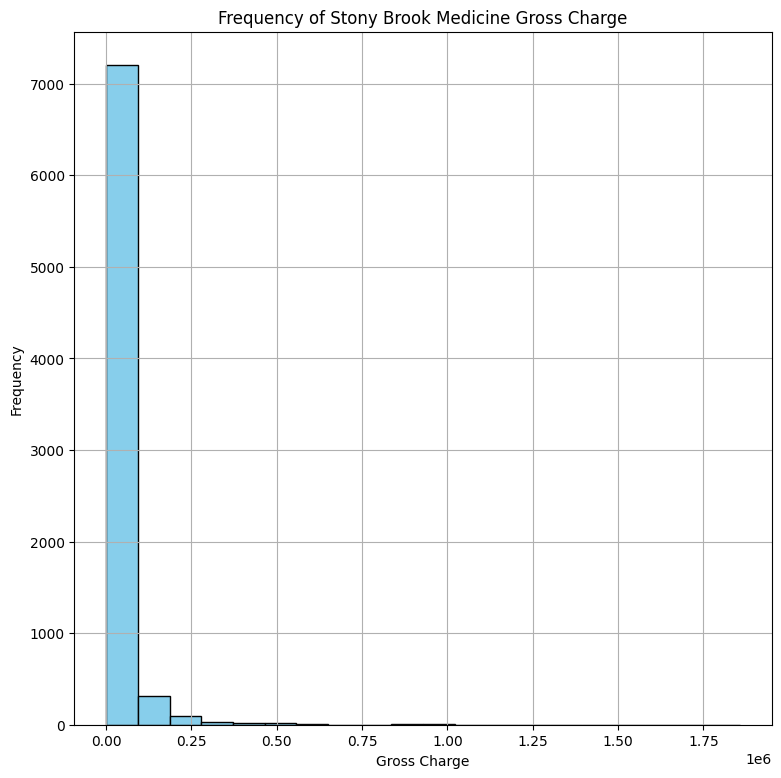

In [163]:
plt.figure(figsize=(9,9))
plt.hist(sbm['grosscharge'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency of Stony Brook Medicine Gross Charge')
plt.xlabel('Gross Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

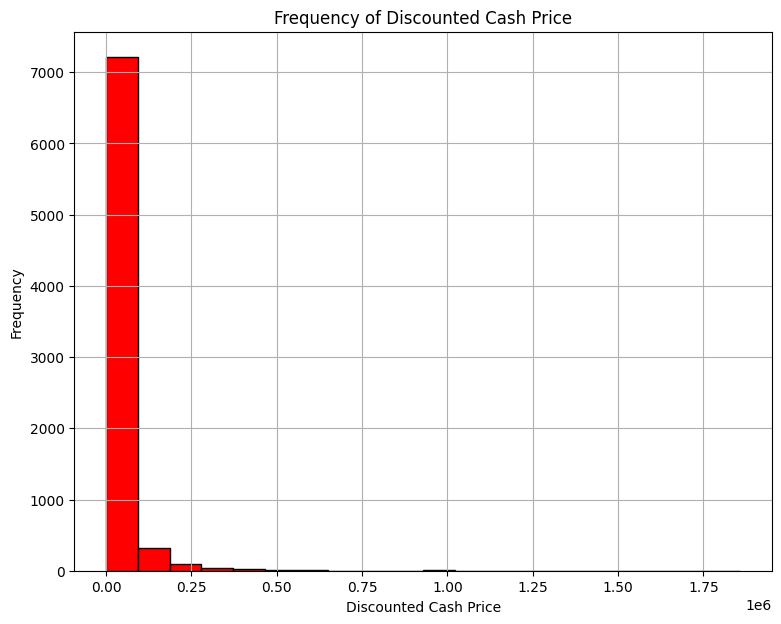

In [166]:
plt.figure(figsize=(9,7))
plt.hist(sbm['discountedcashprice'], bins=20, color='red', edgecolor='black')
plt.title('Frequency of Discounted Cash Price')
plt.xlabel('Discounted Cash Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Memorial Data Distribution

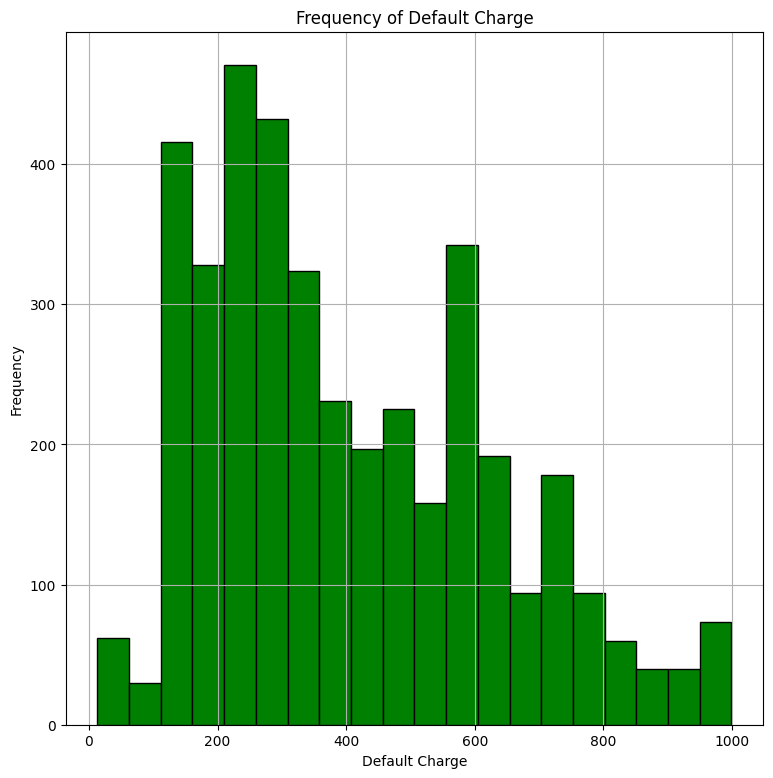

In [167]:
plt.figure(figsize=(9,9))
plt.hist(memorial['defaultcharge'], bins=20, color='Green', edgecolor='black')
plt.title('Frequency of Default Charge')
plt.xlabel('Default Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

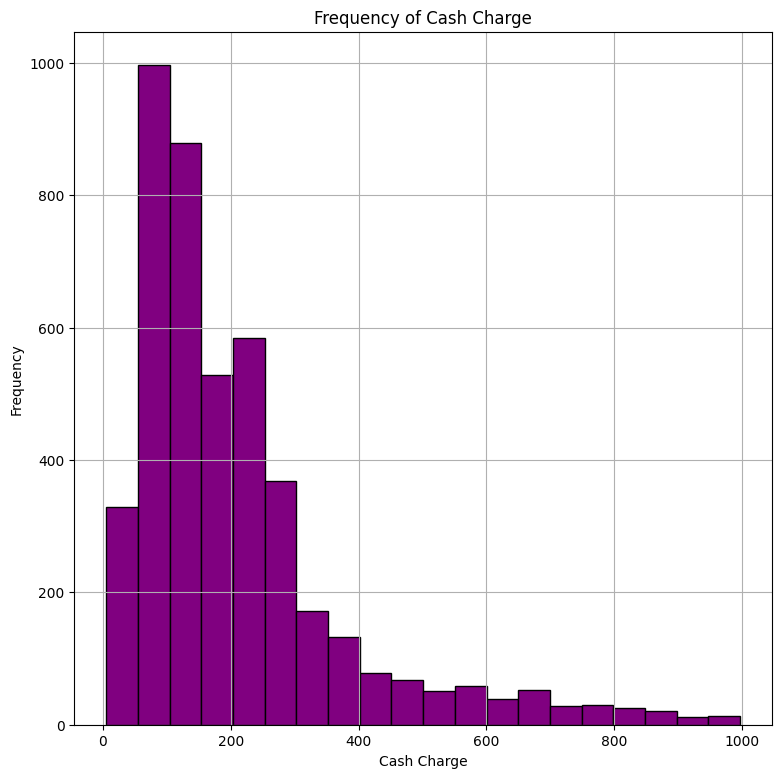

In [168]:
plt.figure(figsize=(9,9))
plt.hist(memorial['cashcharge'], bins=20, color='Purple', edgecolor='black')
plt.title('Frequency of Cash Charge')
plt.xlabel('Cash Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 2. SQLite Database Operations:

In [189]:
import sqlite3

# Connect to the SQLite database (it will create the database if it doesn't exist)
conn = sqlite3.connect('health.db')
conn.close()  # Close the connection when done

In [197]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('health.db')
cursor = conn.cursor()

# Create the 'memorial' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS memorial
    (
        [cdmgrosschargeandcashpaysection] TEXT,
        [procedurecode] INTEGER,
        [proceduredescription] TEXT,
        [lawsonnumber] INTEGER,
        [ndc] TEXT,
        [revenuecode] INTEGER,
        [cptcode] INTEGER,
        [unnamed8] TEXT,
        [defaultcharge] REAL,
        [ercharge] REAL,
        [inpatienttherapy] REAL,
        [cashcharge] REAL
    )
''')

# Insert sample data into the 'memorial' table
cursor.execute('''
    INSERT INTO memorial
    VALUES
        ('11000004', 11000004, 'HC Private Most Common', 0900-06297, 'NaN', 110.0, 'NaN', 'NaN', 2445, 'NaN', 'NaN', 978),
        ('12000005', 12300001, 'HC Semi-Private Obstetrics', 0900-06306, 'NaN', 120.0, 'NaN', 'NaN', 2311, 'NaN', 'NaN', 924)
''')

# Commit the changes
conn.commit()



In [198]:
c.execute('''
SELECT name
FROM sqlite_master
WHERE type= 'table'
''')

c.fetchall()

for value in c.fetchall():
  print(value)

In [199]:
c.execute('''
  SELECT * FROM memorial;
''')

print(c.fetchall())

[('11000004', 11000004, 'HC Private Most Common', -5397, 'NaN', 110, 'NaN', 'NaN', 2445.0, 'NaN', 'NaN', 978.0), ('12000005', 12300001, 'HC Semi-Private Obstetrics', -5406, 'NaN', 120, 'NaN', 'NaN', 2311.0, 'NaN', 'NaN', 924.0), ('11000004', 11000004, 'HC Private Most Common', -5397, 'NaN', 110, 'NaN', 'NaN', 2445.0, 'NaN', 'NaN', 978.0), ('12000005', 12300001, 'HC Semi-Private Obstetrics', -5406, 'NaN', 120, 'NaN', 'NaN', 2311.0, 'NaN', 'NaN', 924.0)]


In [200]:
engine = create_engine('sqlite:///health.db')

In [201]:
memorial = pd.read_sql("select * from memorial;", conn)
memorial

,cdmgrosschargeandcashpaysection,procedurecode,proceduredescription,lawsonnumber,ndc,revenuecode,cptcode,unnamed8,defaultcharge,ercharge,inpatienttherapy,cashcharge
0,11000004,11000004,HC Private Most Common,-5397,NaN,110,NaN,NaN,2445.0,NaN,NaN,978.0
1,12000005,12300001,HC Semi-Private Obstetrics,-5406,NaN,120,NaN,NaN,2311.0,NaN,NaN,924.0
2,11000004,11000004,HC Private Most Common,-5397,NaN,110,NaN,NaN,2445.0,NaN,NaN,978.0
3,12000005,12300001,HC Semi-Private Obstetrics,-5406,NaN,120,NaN,NaN,2311.0,NaN,NaN,924.0


In [203]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('health.db')

# Assuming you have a DataFrame named 'example_data'
memorial.to_sql('memorial', conn, if_exists='replace', index=False)

# Close the connection
conn.close()
